In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
file_path = '/content/Womens Clothing E-Commerce Reviews.csv'
data = pd.read_csv(file_path)

In [ ]:
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
# Dropping rows with missing review text
data_cleaned = data.dropna(subset=["Review Text"])

In [ ]:
# Label the sentiment: Ratings 4 and 5 are Positive, and 1 to 3 are Negative
data_cleaned["Sentiment"] = data_cleaned["Rating"].apply(lambda x: 1 if x >= 4 else 0)

<ipython-input-4-b4018ef5548d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned["Sentiment"] = data_cleaned["Rating"].apply(lambda x: 1 if x >= 4 else 0)


<ipython-input-5-897c786ffa52>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_cleaned, x='Sentiment', palette='coolwarm')


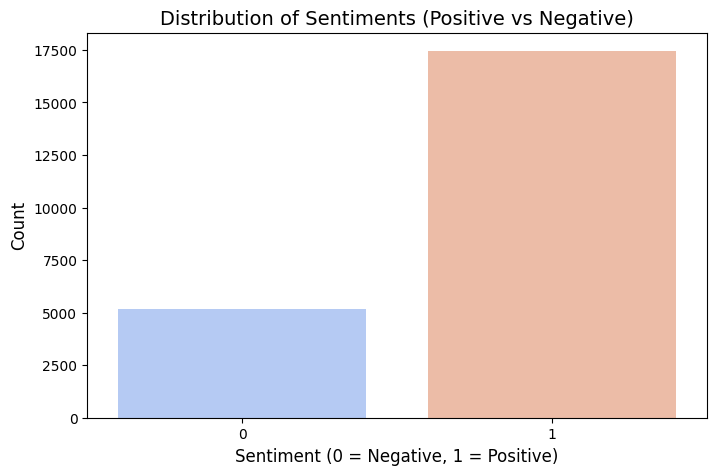

In [ ]:
# Visualization 1: Sentiment Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=data_cleaned, x='Sentiment', palette='coolwarm')
plt.title('Distribution of Sentiments (Positive vs Negative)', fontsize=14)
plt.xlabel('Sentiment (0 = Negative, 1 = Positive)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

<ipython-input-6-38b86783fda0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_cleaned, x='Rating', palette='Set3')


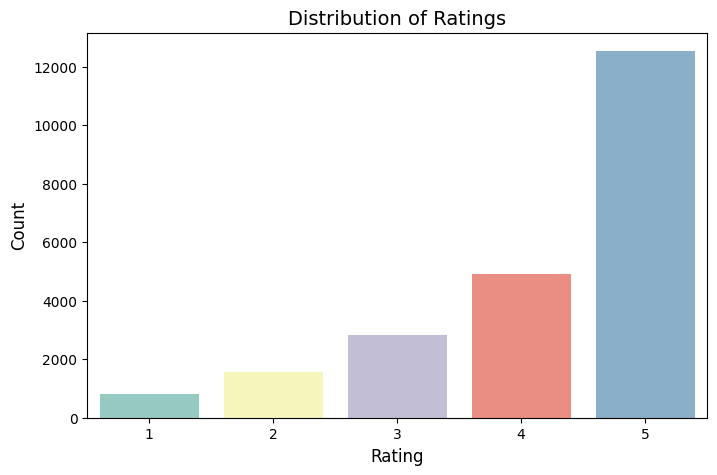

In [ ]:
# Visualization 2: Rating Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=data_cleaned, x='Rating', palette='Set3')
plt.title('Distribution of Ratings', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [ ]:
# Use 'Review Text' as features (X) and 'Sentiment' as labels (y)
X = data_cleaned["Review Text"]
y = data_cleaned["Sentiment"]


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words="english", max_features=1000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [ ]:
# Apply SVM classifier
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_tfidf, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = svm_model.predict(X_test_tfidf)

In [ ]:
# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [ ]:
# Print the results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", report)

Accuracy: 87.86%
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.63      0.71      1045
           1       0.90      0.95      0.92      3484

    accuracy                           0.88      4529
   macro avg       0.85      0.79      0.81      4529
weighted avg       0.87      0.88      0.87      4529



In [ ]:
# Visualization 4: True Sentiment Distribution in Test Set
labels = ['Negative', 'Positive']
values = [sum(y_test == 0), sum(y_test == 1)]

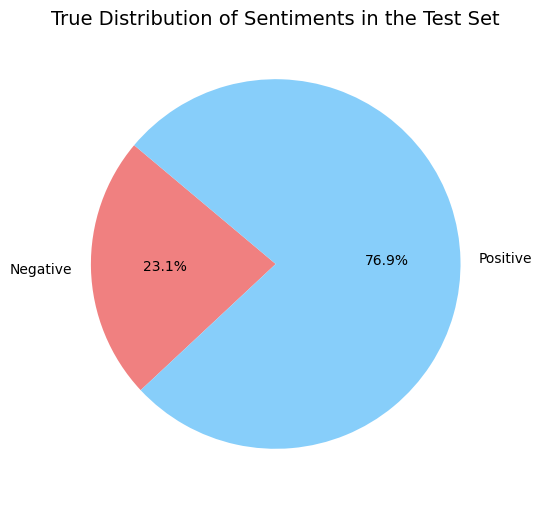

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightskyblue'])
plt.title('True Distribution of Sentiments in the Test Set', fontsize=14)
plt.show()